### Importation of Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder

### Loading the csv file

In [2]:
filename = r"C:\Users\Rise Networks\Documents\Heart_Disease\Heart_data.csv"
df = pd.read_csv(filename)

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,NaN,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,NaN,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [4]:
df.rename(columns=
          {
              "cp": "chest_pain", "trestbps":"resting_bp", "restecg":"rest_ecg", "thalach":"max_hrt", "ca":"vessel"
          }, inplace=True
         )

#### Checking the shape of the dataset

In [5]:
df.shape

(1592, 14)

#### Checking for Null values 

In [6]:
df.isna().sum()

age            79
sex            31
chest_pain    159
resting_bp      0
chol           63
fbs            79
rest_ecg        7
max_hrt         0
exang          47
oldpeak        31
slope          54
vessel          0
thal            7
target          0
dtype: int64

#### Filling up the null values

In [7]:
for i in df.columns:
    if df[i].isna().sum() != 0:
        df[i] = df[i].fillna(method="ffill")

#### Checking for duplicate values

In [8]:
df.duplicated().sum()

549

#### Dropping duplicate values

In [9]:
df.drop_duplicates(inplace=True)

In [10]:
df.shape

(1043, 14)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1043 entries, 0 to 1591
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   age         1043 non-null   float64
 1   sex         1043 non-null   float64
 2   chest_pain  1043 non-null   float64
 3   resting_bp  1043 non-null   float64
 4   chol        1043 non-null   float64
 5   fbs         1043 non-null   float64
 6   rest_ecg    1043 non-null   float64
 7   max_hrt     1043 non-null   float64
 8   exang       1043 non-null   float64
 9   oldpeak     1043 non-null   float64
 10  slope       1043 non-null   float64
 11  vessel      1043 non-null   float64
 12  thal        1043 non-null   float64
 13  target      1043 non-null   int64  
dtypes: float64(13), int64(1)
memory usage: 122.2 KB


In [12]:
df.describe()

,age,sex,chest_pain,resting_bp,chol,fbs,rest_ecg,max_hrt,exang,oldpeak,slope,vessel,thal,target
count,1043.000000,1043.000000,1043.000000,1043.000000,1043.000000,1043.000000,1043.000000,1043.000000,1043.000000,1043.000000,1043.000000,1043.000000,1043.000000,1043.000000
mean,54.165868,0.684564,2.132311,131.548418,247.135187,0.140940,0.792905,149.946309,0.318313,1.048130,1.491850,0.680729,3.557047,0.859060
std,9.094635,0.464912,1.466759,17.753816,51.381527,0.348126,0.840018,23.139172,0.466045,1.160202,0.633881,0.962185,1.876042,0.856432
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.000000,0.000000,1.000000,120.000000,212.000000,0.000000,0.000000,133.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,2.000000,130.000000,243.000000,0.000000,1.000000,154.000000,0.000000,0.800000,1.000000,0.000000,3.000000,1.000000
75%,60.000000,1.000000,3.000000,140.000000,275.000000,0.000000,2.000000,168.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,4.000000,7.000000,4.000000


#### Checking for outliers

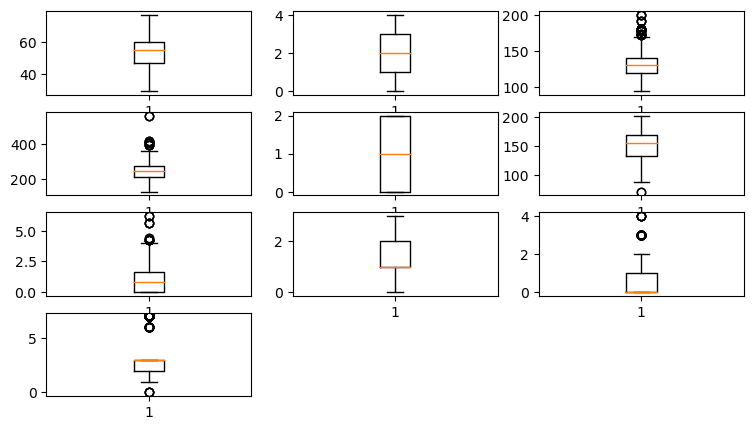

In [13]:
count = 1
plt.figure(figsize=(9,5))
for i in df.drop(columns=["sex", "fbs", "exang", "target"]).columns.to_list():
    plt.subplot(4, 3, count)
    plt.boxplot(df[i])
    count += 1

#### Removing Outliers

In [14]:
outliers_df = df.drop(columns=["sex", "fbs", "exang", "target"])
for i in outliers_df:
    min_quantile, max_quantile = df[i].quantile([0.02, 0.975])
    df = df[(df[i] >= min_quantile) & (df[i] <= max_quantile)]

#### Fixing the target variable

In [15]:
binary = []
non_binary = []
for i in df["target"]:
    if i < 2:
        binary.append(i)
    else:
        non_binary.append(i)

In [16]:
len(binary) / (len(binary) + len(non_binary)) * 100

82.43559718969556

In [17]:
def target(x):
    if x >= 1:
        return 1
    else:
        return 0
df["target"] = df["target"].map(target)

#### Checking if the data is balanced 

In [18]:
df["target"].value_counts(normalize=True)

target
1    0.624122
0    0.375878
Name: proportion, dtype: float64

#### Balancing the imbalanced data using Imblearn library 

In [19]:
from imblearn.over_sampling import RandomOverSampler

In [20]:
over_sampler =RandomOverSampler()

In [21]:
X = df.drop(columns="target")
y = df["target"]

In [22]:
X_over, y_over = over_sampler.fit_resample(X, y)

In [23]:
sampled_df = pd.concat([X_over, y_over], axis=1)

In [24]:
for i in sampled_df.drop(columns="oldpeak").columns.to_list():
    sampled_df[i] = sampled_df[i].astype(int)

### EDA

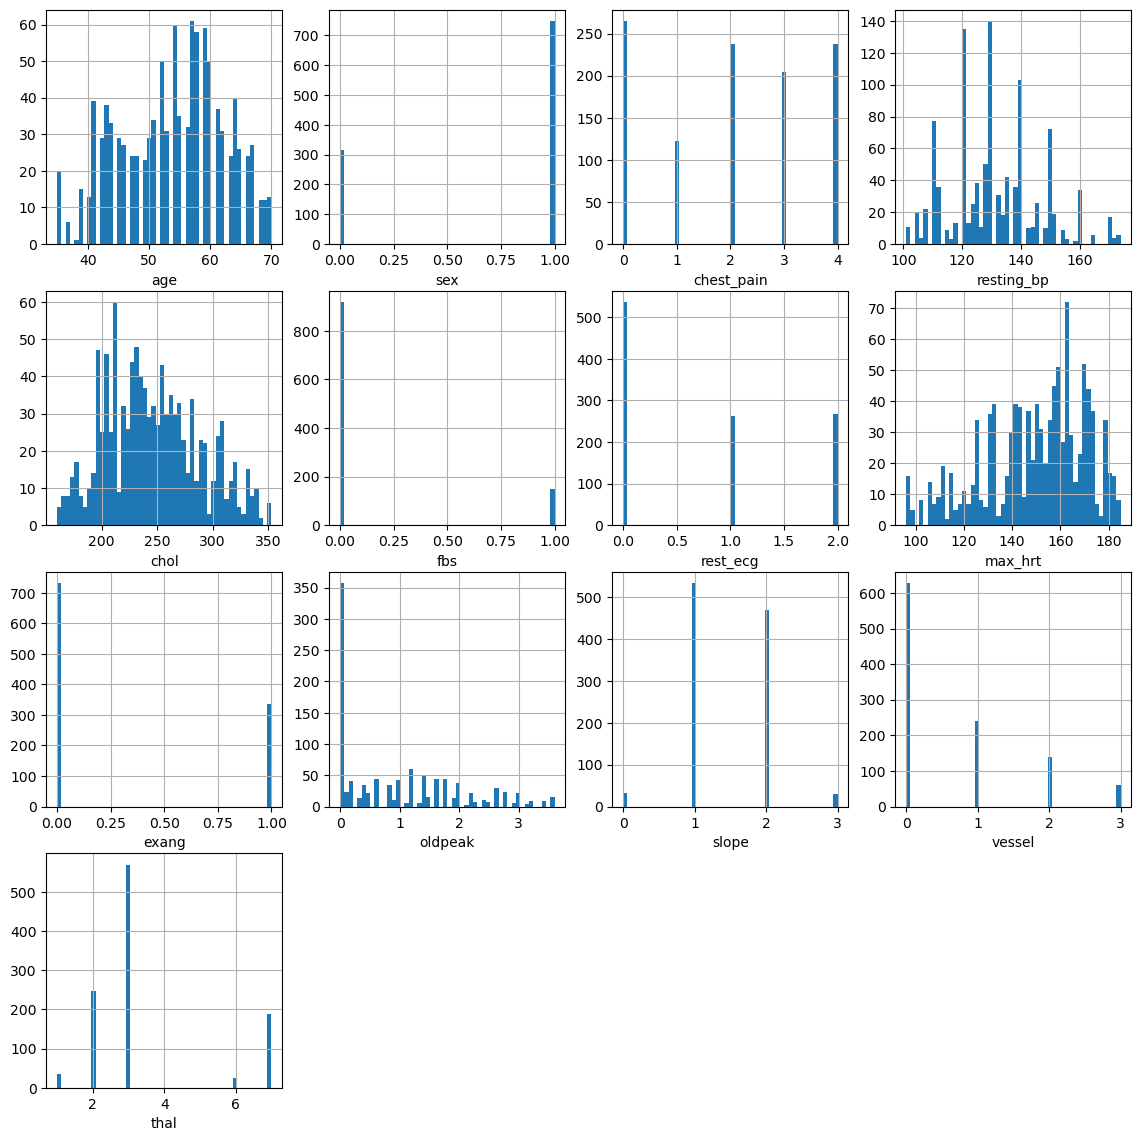

In [25]:
count = 1
plt.figure(figsize=(14,14))
for i in sampled_df.drop(columns="target").columns.to_list():
    plt.subplot(4, 4, count)
    sampled_df[i].hist(bins = 50)
    plt.xlabel(i)
    count += 1

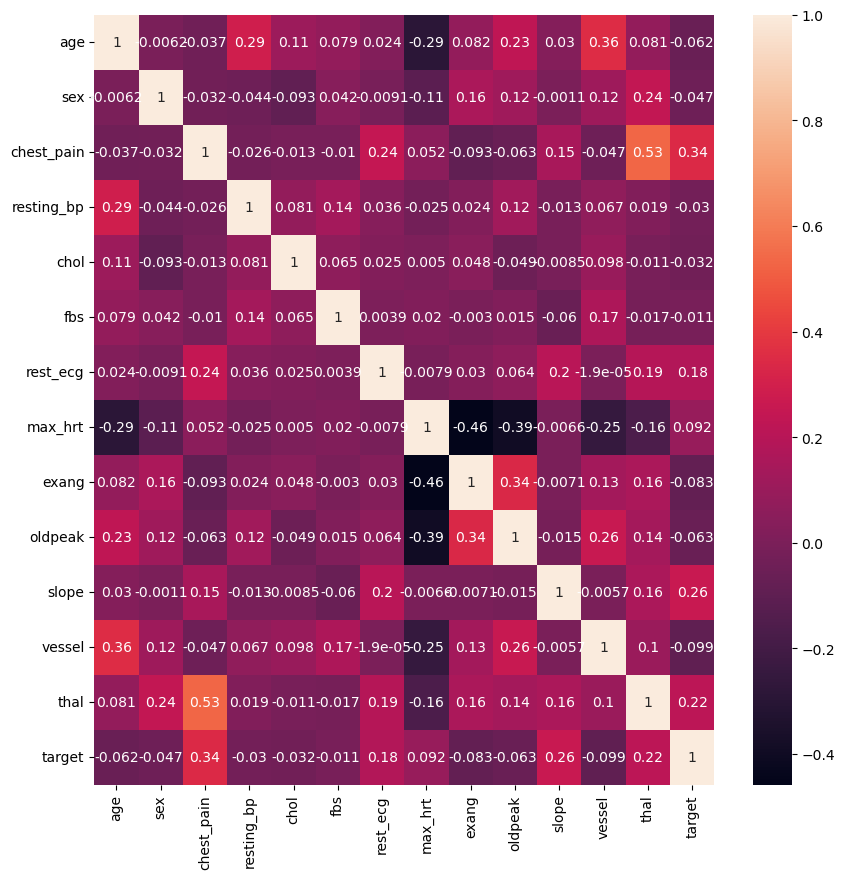

In [26]:
plt.figure(figsize=(10,10))
sns.heatmap(sampled_df.corr(), annot=True);

#### What gender has the highest number of persons with the heart disease

In [27]:
sampled_df["sex"].groupby(sampled_df["target"][sampled_df["target"] == 1]).value_counts()

target  sex
1.0     1      363
        0      170
Name: count, dtype: int64

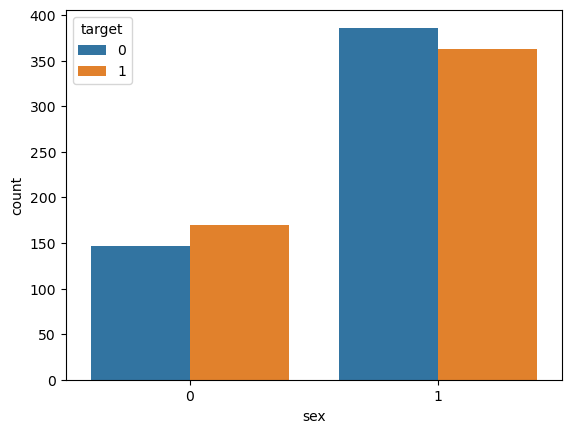

In [28]:
sns.countplot(sampled_df, x="sex", hue="target")
plt.show()

#### What age category has the highest number of persons with the heart disease

In [29]:
def age_category(x):
    if (x <=  71) & (x >= 65):
        return "old"
    elif (x <= 64) & (x >= 55):
        return "senior_adult"
    elif (x <= 54) & (x >= 45):
        return "adult"
    elif (x <= 44) & (x >= 35):
        return "young_adult"
sampled_df["age_category"] = sampled_df["age"].map(age_category)

In [30]:
sampled_df["age_category"].groupby(sampled_df["target"]).value_counts()

target  age_category
0       senior_adult    234
        adult           152
        young_adult      87
        old              60
1       senior_adult    193
        adult           179
        young_adult     107
        old              54
Name: count, dtype: int64

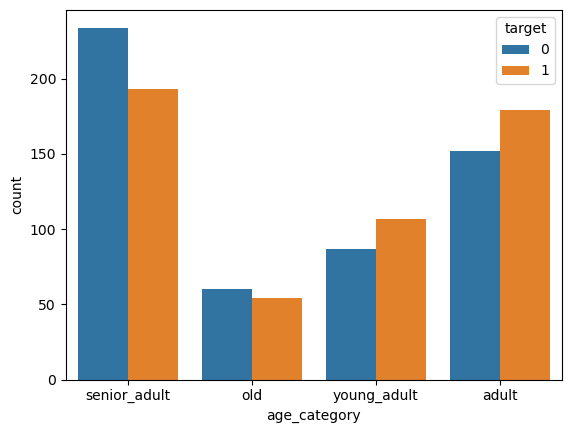

In [31]:
sns.countplot(sampled_df, x="age_category", hue="target")
plt.show()

#### Relationship between chest pain and the heart disease 

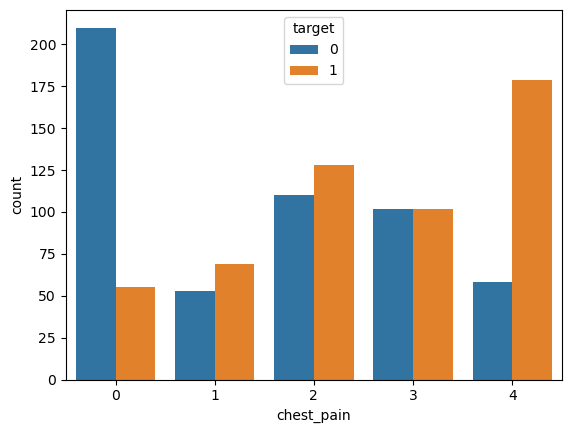

In [32]:
sns.countplot(sampled_df, x="chest_pain", hue="target")
plt.show()

#### Relationship between resting blood pressure and the heart disease

In [33]:
def bp_category(x):
    if (x <= 178) & (x >=  160):
        return "stage_2_hypertension"
    elif (x <= 159) & (x >= 140):
        return "stage_1_hypertension"
    elif (x <= 139) & (x >= 120):
        return "elevated"
    elif (x <= 119) & (x >= 100):
        return "normal"
sampled_df["resting_bp_cat"] = sampled_df["resting_bp"].map(bp_category)

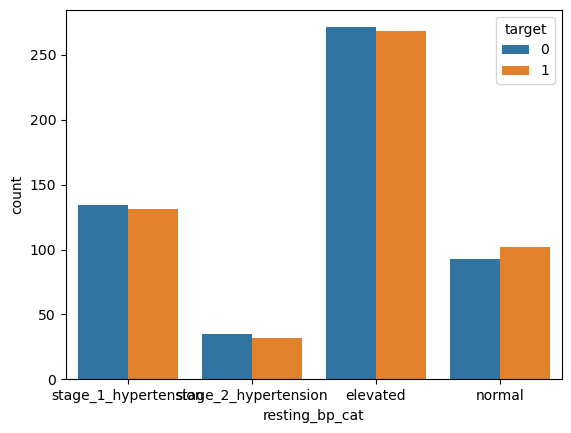

In [34]:
sns.countplot(sampled_df, x="resting_bp_cat", hue="target")
plt.show()

#### Relationship between resting bloodpressure and cholesterol

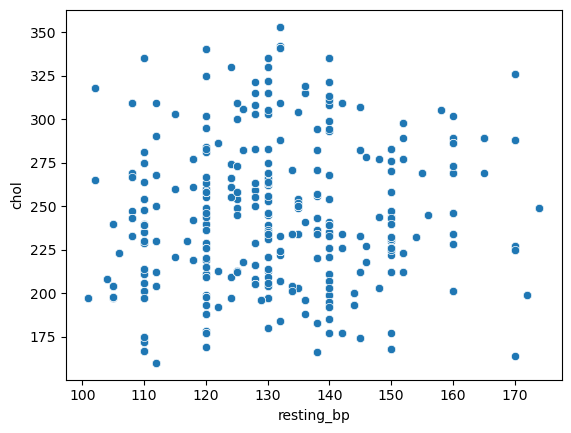

In [35]:
sns.scatterplot(sampled_df, x="resting_bp", y="chol")
plt.show()

#### Relationship between chol and the heart disease

In [36]:
def chol_category(x):
    if (x <= 360) & (x >=  281):
        return "very_high"
    elif (x <= 280) & (x >= 241):
        return "high"
    elif (x <= 240) & (x >= 201):
        return "moderate"
    elif (x <= 200) & (x >= 149):
        return "desirable"
sampled_df["chol_cat"] = sampled_df["chol"].map(chol_category)

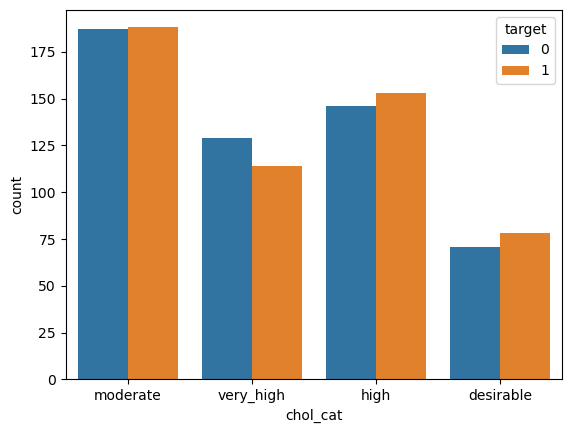

In [37]:
sns.countplot(sampled_df, x="chol_cat", hue="target")
plt.show()

#### Relationship between fasbt blood sugar and the heart disease

<Axes: xlabel='fbs', ylabel='count'>

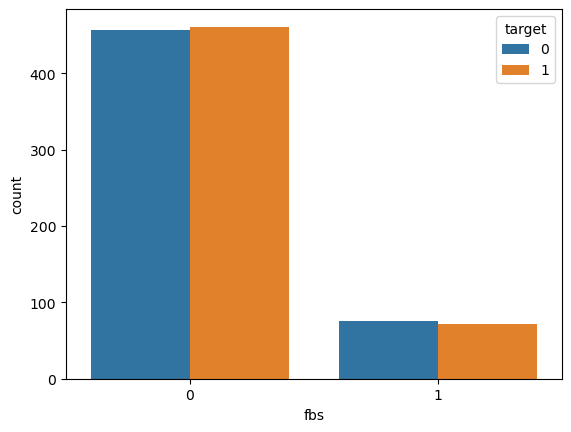

In [38]:
sns.countplot(sampled_df, x="fbs", hue="target")

#### Relationship between rest_ecg and the heart disease

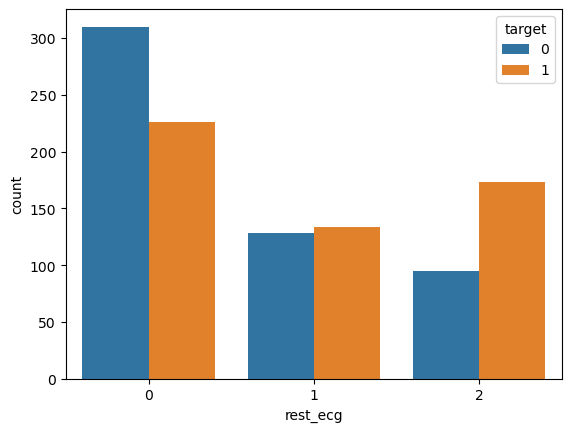

In [39]:
sns.countplot(sampled_df, x="rest_ecg", hue="target")
plt.show()

### Data Preprocessing

In [40]:
sampled_df["age_category"].replace(
    {"young_adult": 0, "adult": 1, "senior_adult": 2, "old": 3}, inplace=True
)

In [41]:
sampled_df["resting_bp_cat"].replace(
    {"normal": 0, "elevated": 1, "stage_1_hypertension": 2, "stage_2_hypertension": 3}, inplace=True
)

In [42]:
sampled_df["chol_cat"].replace(
    {"desirable": 0, "moderate": 1, "high": 2, "very_high": 3}, inplace=True
)

### Evaluation

#### Correlation coefficient of each variable

In [43]:
corr_coef = {}
for i in sampled_df.drop(columns="target").columns.to_list():
    corr_coef[i] = sampled_df[i].corr(sampled_df["target"])
corr_coef

{'age': -0.062343421732345944,
 'sex': -0.047201662584264184,
 'chest_pain': 0.3398558643731122,
 'resting_bp': -0.030351060104592466,
 'chol': -0.03223373319714129,
 'fbs': -0.010851950223216871,
 'rest_ecg': 0.18281583371274168,
 'max_hrt': 0.09195461462291667,
 'exang': -0.08285195578237553,
 'oldpeak': -0.06266490131984646,
 'slope': 0.26006191950464397,
 'vessel': -0.09887433102477246,
 'thal': 0.21580238634627746,
 'age_category': -0.07547216448515631,
 'resting_bp_cat': -0.021003743667503506,
 'chol_cat': -0.028484698426887542}

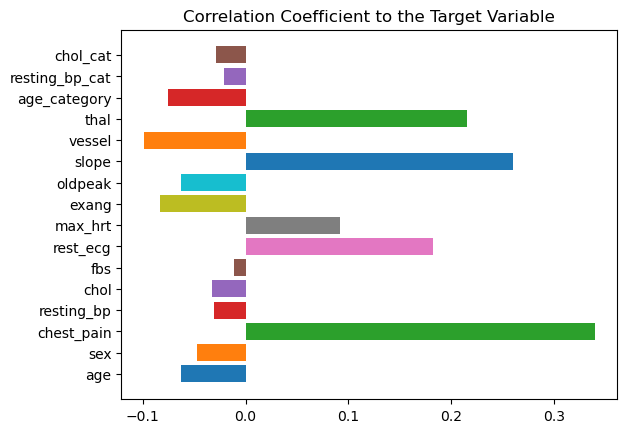

In [44]:
for var, values in corr_coef.items():
    plt.barh(var, values)
    plt.title("Correlation Coefficient to the Target Variable")

#### Dropping leaky variables and variables with little predicting power

In [45]:
cols = ["chol_cat", "resting_bp", "age", "resting_bp_cat", "fbs", "chol"]
sampled_df.drop(columns=cols, inplace=True)

In [49]:
X = sampled_df.drop(columns="target")
y = sampled_df["target"]

In [50]:
scaler = StandardScaler()
X[["max_hrt", "oldpeak"]] = scaler.fit_transform(X[["max_hrt", "oldpeak"]])

#### Splitting the data into training and testing sets

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Building the model

#### Logistic Regression

In [52]:
lr = LogisticRegression(random_state=42)
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)
print("The accuracy on training set:", lr.score(X_train, y_train))
print("The accuracy on testing set:", accuracy_score(lr_pred, y_test))

The accuracy on training set: 0.6995305164319249
The accuracy on testing set: 0.6261682242990654


#### RandomForestClassifier

In [53]:
rfc = RandomForestClassifier(random_state=42)
rfc.fit(X_train, y_train)
rfc_pred = rfc.predict(X_test)
print("The accuracy on training set:", rfc.score(X_train, y_train))
print("The accuracy on testing set:", accuracy_score(rfc_pred, y_test))

The accuracy on training set: 0.931924882629108
The accuracy on testing set: 0.7149532710280374


#### GradientBoostingClassifier

In [54]:
gdc = GradientBoostingClassifier(random_state=42)
gdc.fit(X_train, y_train)
gdc_pred = gdc.predict(X_test)
print("The accuracy on training set:", gdc.score(X_train, y_train))
print("The accuracy on testing set:", accuracy_score(gdc_pred, y_test))

The accuracy on training set: 0.8438967136150235
The accuracy on testing set: 0.6822429906542056


#### DecisionTreeClassifier

In [55]:
dtc = DecisionTreeClassifier(random_state=42)
dtc.fit(X_train, y_train)
dtc_pred = dtc.predict(X_test)
print("The accuracy on training set:", dtc.score(X_train, y_train))
print("The accuracy on testing set:", accuracy_score(dtc_pred, y_test))

The accuracy on training set: 0.931924882629108
The accuracy on testing set: 0.719626168224299


#### Hyperparameter Tuning

In [56]:
parameters = {
    "LogisticRegression": {
        "classifier": LogisticRegression(random_state=42),
        "params": {
            "penalty": ["l1", "l2"],
            "C": [0.001, 0.01, 0.1, 1, 10, 100],
            "solver": ["liblinear", "saga"]
        }
    },
    "RandomForestClassifier": {
        "classifier": RandomForestClassifier(random_state=42),
        "params": {
            "n_estimators": [10, 50, 100],
            "max_depth": [10, 20, 30],
            "min_samples_leaf": [1, 2, 4],
            "min_samples_split": [2, 5, 10]
        }
    },
    "GradientBoostingClassifier": {
        "classifier": GradientBoostingClassifier(random_state=42),
        "params": {
            "n_estimators": [50, 100, 150],
            "max_depth": [3, 5, 7],
            "learning_rate": [0.01, 0.1, 0.5],
            "min_samples_split": [2, 5, 10]
        }
    },
    "DecisionTreeClassifier": {
        "classifier": DecisionTreeClassifier(random_state=42),
        "params": {
            "criterion": ["gini", "entropy"],
            "splitter": ["best", "random"],
            "max_depth": [10, 20, 30],
            "min_samples_leaf": [1, 2, 4],
            "min_samples_split": [2, 5, 10]
        }
    }
}

#### Using GridSearchCv

In [57]:
performance = []
testing = []
for classifier, params in parameters.items():
    model = GridSearchCV(params["classifier"], params["params"], cv=5, verbose=10, scoring="roc_auc")
    
    model.fit(X_train, y_train)
    ypred = model.predict(X_test)
    
    performance.append({"Model": classifier, "Best Score": model.best_score_, "Best Parameters": model.best_params_})
    testing.append({"Model": classifier, "score": accuracy_score(ypred, y_test)})

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV 1/5; 1/24] START C=0.001, penalty=l1, solver=liblinear......................
[CV 1/5; 1/24] END C=0.001, penalty=l1, solver=liblinear;, score=0.500 total time=   0.0s
[CV 2/5; 1/24] START C=0.001, penalty=l1, solver=liblinear......................
[CV 2/5; 1/24] END C=0.001, penalty=l1, solver=liblinear;, score=0.500 total time=   0.0s
[CV 3/5; 1/24] START C=0.001, penalty=l1, solver=liblinear......................
[CV 3/5; 1/24] END C=0.001, penalty=l1, solver=liblinear;, score=0.500 total time=   0.0s
[CV 4/5; 1/24] START C=0.001, penalty=l1, solver=liblinear......................
[CV 4/5; 1/24] END C=0.001, penalty=l1, solver=liblinear;, score=0.500 total time=   0.0s
[CV 5/5; 1/24] START C=0.001, penalty=l1, solver=liblinear......................
[CV 5/5; 1/24] END C=0.001, penalty=l1, solver=liblinear;, score=0.500 total time=   0.0s
[CV 1/5; 2/24] START C=0.001, penalty=l1, solver=saga...........................
[C

[CV 4/5; 10/24] END C=0.1, penalty=l1, solver=saga;, score=0.701 total time=   0.0s
[CV 5/5; 10/24] START C=0.1, penalty=l1, solver=saga............................
[CV 5/5; 10/24] END C=0.1, penalty=l1, solver=saga;, score=0.826 total time=   0.0s
[CV 1/5; 11/24] START C=0.1, penalty=l2, solver=liblinear.......................
[CV 1/5; 11/24] END C=0.1, penalty=l2, solver=liblinear;, score=0.730 total time=   0.0s
[CV 2/5; 11/24] START C=0.1, penalty=l2, solver=liblinear.......................
[CV 2/5; 11/24] END C=0.1, penalty=l2, solver=liblinear;, score=0.695 total time=   0.0s
[CV 3/5; 11/24] START C=0.1, penalty=l2, solver=liblinear.......................
[CV 3/5; 11/24] END C=0.1, penalty=l2, solver=liblinear;, score=0.690 total time=   0.0s
[CV 4/5; 11/24] START C=0.1, penalty=l2, solver=liblinear.......................
[CV 4/5; 11/24] END C=0.1, penalty=l2, solver=liblinear;, score=0.714 total time=   0.0s
[CV 5/5; 11/24] START C=0.1, penalty=l2, solver=liblinear..............

[CV 1/5; 22/24] END C=100, penalty=l1, solver=saga;, score=0.739 total time=   0.0s
[CV 2/5; 22/24] START C=100, penalty=l1, solver=saga............................
[CV 2/5; 22/24] END C=100, penalty=l1, solver=saga;, score=0.722 total time=   0.0s
[CV 3/5; 22/24] START C=100, penalty=l1, solver=saga............................
[CV 3/5; 22/24] END C=100, penalty=l1, solver=saga;, score=0.711 total time=   0.0s
[CV 4/5; 22/24] START C=100, penalty=l1, solver=saga............................
[CV 4/5; 22/24] END C=100, penalty=l1, solver=saga;, score=0.699 total time=   0.0s
[CV 5/5; 22/24] START C=100, penalty=l1, solver=saga............................
[CV 5/5; 22/24] END C=100, penalty=l1, solver=saga;, score=0.808 total time=   0.0s
[CV 1/5; 23/24] START C=100, penalty=l2, solver=liblinear.......................
[CV 1/5; 23/24] END C=100, penalty=l2, solver=liblinear;, score=0.738 total time=   0.0s
[CV 2/5; 23/24] START C=100, penalty=l2, solver=liblinear.......................
[CV 2

[CV 3/5; 6/81] END max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=100;, score=0.830 total time=   0.2s
[CV 4/5; 6/81] START max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=100
[CV 4/5; 6/81] END max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=100;, score=0.806 total time=   0.2s
[CV 5/5; 6/81] START max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=100
[CV 5/5; 6/81] END max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=100;, score=0.865 total time=   0.2s
[CV 1/5; 7/81] START max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=10
[CV 1/5; 7/81] END max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=10;, score=0.865 total time=   0.0s
[CV 2/5; 7/81] START max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=10
[CV 2/5; 7/81] END max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=10;, score=0.851 total time=   0.0s
[CV 3/5;

[CV 1/5; 14/81] END max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=50;, score=0.876 total time=   0.0s
[CV 2/5; 14/81] START max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=50
[CV 2/5; 14/81] END max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=50;, score=0.869 total time=   0.0s
[CV 3/5; 14/81] START max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=50
[CV 3/5; 14/81] END max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=50;, score=0.826 total time=   0.0s
[CV 4/5; 14/81] START max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=50
[CV 4/5; 14/81] END max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=50;, score=0.804 total time=   0.1s
[CV 5/5; 14/81] START max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=50
[CV 5/5; 14/81] END max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=50;, score=0.868 total time=   0.1s
[CV 1/5;

[CV 4/5; 21/81] END max_depth=10, min_samples_leaf=4, min_samples_split=2, n_estimators=100;, score=0.789 total time=   0.2s
[CV 5/5; 21/81] START max_depth=10, min_samples_leaf=4, min_samples_split=2, n_estimators=100
[CV 5/5; 21/81] END max_depth=10, min_samples_leaf=4, min_samples_split=2, n_estimators=100;, score=0.865 total time=   0.2s
[CV 1/5; 22/81] START max_depth=10, min_samples_leaf=4, min_samples_split=5, n_estimators=10
[CV 1/5; 22/81] END max_depth=10, min_samples_leaf=4, min_samples_split=5, n_estimators=10;, score=0.852 total time=   0.0s
[CV 2/5; 22/81] START max_depth=10, min_samples_leaf=4, min_samples_split=5, n_estimators=10
[CV 2/5; 22/81] END max_depth=10, min_samples_leaf=4, min_samples_split=5, n_estimators=10;, score=0.843 total time=   0.0s
[CV 3/5; 22/81] START max_depth=10, min_samples_leaf=4, min_samples_split=5, n_estimators=10
[CV 3/5; 22/81] END max_depth=10, min_samples_leaf=4, min_samples_split=5, n_estimators=10;, score=0.799 total time=   0.0s
[CV 4

[CV 2/5; 29/81] END max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.839 total time=   0.2s
[CV 3/5; 29/81] START max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=50
[CV 3/5; 29/81] END max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.823 total time=   0.1s
[CV 4/5; 29/81] START max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=50
[CV 4/5; 29/81] END max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.824 total time=   0.1s
[CV 5/5; 29/81] START max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=50
[CV 5/5; 29/81] END max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.841 total time=   0.2s
[CV 1/5; 30/81] START max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=100
[CV 1/5; 30/81] END max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.861 total time=   0.2s
[CV 2/

[CV 5/5; 36/81] END max_depth=20, min_samples_leaf=1, min_samples_split=10, n_estimators=100;, score=0.853 total time=   0.2s
[CV 1/5; 37/81] START max_depth=20, min_samples_leaf=2, min_samples_split=2, n_estimators=10
[CV 1/5; 37/81] END max_depth=20, min_samples_leaf=2, min_samples_split=2, n_estimators=10;, score=0.852 total time=   0.0s
[CV 2/5; 37/81] START max_depth=20, min_samples_leaf=2, min_samples_split=2, n_estimators=10
[CV 2/5; 37/81] END max_depth=20, min_samples_leaf=2, min_samples_split=2, n_estimators=10;, score=0.850 total time=   0.0s
[CV 3/5; 37/81] START max_depth=20, min_samples_leaf=2, min_samples_split=2, n_estimators=10
[CV 3/5; 37/81] END max_depth=20, min_samples_leaf=2, min_samples_split=2, n_estimators=10;, score=0.816 total time=   0.0s
[CV 4/5; 37/81] START max_depth=20, min_samples_leaf=2, min_samples_split=2, n_estimators=10
[CV 4/5; 37/81] END max_depth=20, min_samples_leaf=2, min_samples_split=2, n_estimators=10;, score=0.788 total time=   0.0s
[CV 5/

[CV 3/5; 44/81] END max_depth=20, min_samples_leaf=2, min_samples_split=10, n_estimators=50;, score=0.817 total time=   0.0s
[CV 4/5; 44/81] START max_depth=20, min_samples_leaf=2, min_samples_split=10, n_estimators=50
[CV 4/5; 44/81] END max_depth=20, min_samples_leaf=2, min_samples_split=10, n_estimators=50;, score=0.782 total time=   0.1s
[CV 5/5; 44/81] START max_depth=20, min_samples_leaf=2, min_samples_split=10, n_estimators=50
[CV 5/5; 44/81] END max_depth=20, min_samples_leaf=2, min_samples_split=10, n_estimators=50;, score=0.852 total time=   0.0s
[CV 1/5; 45/81] START max_depth=20, min_samples_leaf=2, min_samples_split=10, n_estimators=100
[CV 1/5; 45/81] END max_depth=20, min_samples_leaf=2, min_samples_split=10, n_estimators=100;, score=0.876 total time=   0.2s
[CV 2/5; 45/81] START max_depth=20, min_samples_leaf=2, min_samples_split=10, n_estimators=100
[CV 2/5; 45/81] END max_depth=20, min_samples_leaf=2, min_samples_split=10, n_estimators=100;, score=0.858 total time=   

[CV 1/5; 53/81] END max_depth=20, min_samples_leaf=4, min_samples_split=10, n_estimators=50;, score=0.873 total time=   0.0s
[CV 2/5; 53/81] START max_depth=20, min_samples_leaf=4, min_samples_split=10, n_estimators=50
[CV 2/5; 53/81] END max_depth=20, min_samples_leaf=4, min_samples_split=10, n_estimators=50;, score=0.860 total time=   0.0s
[CV 3/5; 53/81] START max_depth=20, min_samples_leaf=4, min_samples_split=10, n_estimators=50
[CV 3/5; 53/81] END max_depth=20, min_samples_leaf=4, min_samples_split=10, n_estimators=50;, score=0.815 total time=   0.1s
[CV 4/5; 53/81] START max_depth=20, min_samples_leaf=4, min_samples_split=10, n_estimators=50
[CV 4/5; 53/81] END max_depth=20, min_samples_leaf=4, min_samples_split=10, n_estimators=50;, score=0.783 total time=   0.1s
[CV 5/5; 53/81] START max_depth=20, min_samples_leaf=4, min_samples_split=10, n_estimators=50
[CV 5/5; 53/81] END max_depth=20, min_samples_leaf=4, min_samples_split=10, n_estimators=50;, score=0.856 total time=   0.0s

[CV 4/5; 60/81] END max_depth=30, min_samples_leaf=1, min_samples_split=5, n_estimators=100;, score=0.808 total time=   0.2s
[CV 5/5; 60/81] START max_depth=30, min_samples_leaf=1, min_samples_split=5, n_estimators=100
[CV 5/5; 60/81] END max_depth=30, min_samples_leaf=1, min_samples_split=5, n_estimators=100;, score=0.850 total time=   0.2s
[CV 1/5; 61/81] START max_depth=30, min_samples_leaf=1, min_samples_split=10, n_estimators=10
[CV 1/5; 61/81] END max_depth=30, min_samples_leaf=1, min_samples_split=10, n_estimators=10;, score=0.859 total time=   0.0s
[CV 2/5; 61/81] START max_depth=30, min_samples_leaf=1, min_samples_split=10, n_estimators=10
[CV 2/5; 61/81] END max_depth=30, min_samples_leaf=1, min_samples_split=10, n_estimators=10;, score=0.840 total time=   0.0s
[CV 3/5; 61/81] START max_depth=30, min_samples_leaf=1, min_samples_split=10, n_estimators=10
[CV 3/5; 61/81] END max_depth=30, min_samples_leaf=1, min_samples_split=10, n_estimators=10;, score=0.802 total time=   0.0s

[CV 3/5; 68/81] END max_depth=30, min_samples_leaf=2, min_samples_split=5, n_estimators=50;, score=0.827 total time=   0.0s
[CV 4/5; 68/81] START max_depth=30, min_samples_leaf=2, min_samples_split=5, n_estimators=50
[CV 4/5; 68/81] END max_depth=30, min_samples_leaf=2, min_samples_split=5, n_estimators=50;, score=0.806 total time=   0.0s
[CV 5/5; 68/81] START max_depth=30, min_samples_leaf=2, min_samples_split=5, n_estimators=50
[CV 5/5; 68/81] END max_depth=30, min_samples_leaf=2, min_samples_split=5, n_estimators=50;, score=0.853 total time=   0.0s
[CV 1/5; 69/81] START max_depth=30, min_samples_leaf=2, min_samples_split=5, n_estimators=100
[CV 1/5; 69/81] END max_depth=30, min_samples_leaf=2, min_samples_split=5, n_estimators=100;, score=0.871 total time=   0.2s
[CV 2/5; 69/81] START max_depth=30, min_samples_leaf=2, min_samples_split=5, n_estimators=100
[CV 2/5; 69/81] END max_depth=30, min_samples_leaf=2, min_samples_split=5, n_estimators=100;, score=0.861 total time=   0.2s
[CV 

[CV 5/5; 76/81] END max_depth=30, min_samples_leaf=4, min_samples_split=5, n_estimators=10;, score=0.845 total time=   0.0s
[CV 1/5; 77/81] START max_depth=30, min_samples_leaf=4, min_samples_split=5, n_estimators=50
[CV 1/5; 77/81] END max_depth=30, min_samples_leaf=4, min_samples_split=5, n_estimators=50;, score=0.880 total time=   0.0s
[CV 2/5; 77/81] START max_depth=30, min_samples_leaf=4, min_samples_split=5, n_estimators=50
[CV 2/5; 77/81] END max_depth=30, min_samples_leaf=4, min_samples_split=5, n_estimators=50;, score=0.851 total time=   0.0s
[CV 3/5; 77/81] START max_depth=30, min_samples_leaf=4, min_samples_split=5, n_estimators=50
[CV 3/5; 77/81] END max_depth=30, min_samples_leaf=4, min_samples_split=5, n_estimators=50;, score=0.825 total time=   0.1s
[CV 4/5; 77/81] START max_depth=30, min_samples_leaf=4, min_samples_split=5, n_estimators=50
[CV 4/5; 77/81] END max_depth=30, min_samples_leaf=4, min_samples_split=5, n_estimators=50;, score=0.785 total time=   0.0s
[CV 5/5;

[CV 3/5; 3/81] END learning_rate=0.01, max_depth=3, min_samples_split=2, n_estimators=150;, score=0.814 total time=   0.1s
[CV 4/5; 3/81] START learning_rate=0.01, max_depth=3, min_samples_split=2, n_estimators=150
[CV 4/5; 3/81] END learning_rate=0.01, max_depth=3, min_samples_split=2, n_estimators=150;, score=0.751 total time=   0.2s
[CV 5/5; 3/81] START learning_rate=0.01, max_depth=3, min_samples_split=2, n_estimators=150
[CV 5/5; 3/81] END learning_rate=0.01, max_depth=3, min_samples_split=2, n_estimators=150;, score=0.849 total time=   0.1s
[CV 1/5; 4/81] START learning_rate=0.01, max_depth=3, min_samples_split=5, n_estimators=50
[CV 1/5; 4/81] END learning_rate=0.01, max_depth=3, min_samples_split=5, n_estimators=50;, score=0.804 total time=   0.0s
[CV 2/5; 4/81] START learning_rate=0.01, max_depth=3, min_samples_split=5, n_estimators=50
[CV 2/5; 4/81] END learning_rate=0.01, max_depth=3, min_samples_split=5, n_estimators=50;, score=0.825 total time=   0.0s
[CV 3/5; 4/81] START 

[CV 2/5; 11/81] END learning_rate=0.01, max_depth=5, min_samples_split=2, n_estimators=100;, score=0.869 total time=   0.2s
[CV 3/5; 11/81] START learning_rate=0.01, max_depth=5, min_samples_split=2, n_estimators=100
[CV 3/5; 11/81] END learning_rate=0.01, max_depth=5, min_samples_split=2, n_estimators=100;, score=0.817 total time=   0.2s
[CV 4/5; 11/81] START learning_rate=0.01, max_depth=5, min_samples_split=2, n_estimators=100
[CV 4/5; 11/81] END learning_rate=0.01, max_depth=5, min_samples_split=2, n_estimators=100;, score=0.760 total time=   0.2s
[CV 5/5; 11/81] START learning_rate=0.01, max_depth=5, min_samples_split=2, n_estimators=100
[CV 5/5; 11/81] END learning_rate=0.01, max_depth=5, min_samples_split=2, n_estimators=100;, score=0.843 total time=   0.3s
[CV 1/5; 12/81] START learning_rate=0.01, max_depth=5, min_samples_split=2, n_estimators=150
[CV 1/5; 12/81] END learning_rate=0.01, max_depth=5, min_samples_split=2, n_estimators=150;, score=0.890 total time=   0.3s
[CV 2/5;

[CV 5/5; 18/81] END learning_rate=0.01, max_depth=5, min_samples_split=10, n_estimators=150;, score=0.867 total time=   0.4s
[CV 1/5; 19/81] START learning_rate=0.01, max_depth=7, min_samples_split=2, n_estimators=50
[CV 1/5; 19/81] END learning_rate=0.01, max_depth=7, min_samples_split=2, n_estimators=50;, score=0.848 total time=   0.2s
[CV 2/5; 19/81] START learning_rate=0.01, max_depth=7, min_samples_split=2, n_estimators=50
[CV 2/5; 19/81] END learning_rate=0.01, max_depth=7, min_samples_split=2, n_estimators=50;, score=0.850 total time=   0.2s
[CV 3/5; 19/81] START learning_rate=0.01, max_depth=7, min_samples_split=2, n_estimators=50
[CV 3/5; 19/81] END learning_rate=0.01, max_depth=7, min_samples_split=2, n_estimators=50;, score=0.825 total time=   0.1s
[CV 4/5; 19/81] START learning_rate=0.01, max_depth=7, min_samples_split=2, n_estimators=50
[CV 4/5; 19/81] END learning_rate=0.01, max_depth=7, min_samples_split=2, n_estimators=50;, score=0.750 total time=   0.3s
[CV 5/5; 19/81]

[CV 3/5; 26/81] END learning_rate=0.01, max_depth=7, min_samples_split=10, n_estimators=100;, score=0.814 total time=   0.4s
[CV 4/5; 26/81] START learning_rate=0.01, max_depth=7, min_samples_split=10, n_estimators=100
[CV 4/5; 26/81] END learning_rate=0.01, max_depth=7, min_samples_split=10, n_estimators=100;, score=0.747 total time=   0.4s
[CV 5/5; 26/81] START learning_rate=0.01, max_depth=7, min_samples_split=10, n_estimators=100
[CV 5/5; 26/81] END learning_rate=0.01, max_depth=7, min_samples_split=10, n_estimators=100;, score=0.872 total time=   0.4s
[CV 1/5; 27/81] START learning_rate=0.01, max_depth=7, min_samples_split=10, n_estimators=150
[CV 1/5; 27/81] END learning_rate=0.01, max_depth=7, min_samples_split=10, n_estimators=150;, score=0.858 total time=   0.6s
[CV 2/5; 27/81] START learning_rate=0.01, max_depth=7, min_samples_split=10, n_estimators=150
[CV 2/5; 27/81] END learning_rate=0.01, max_depth=7, min_samples_split=10, n_estimators=150;, score=0.859 total time=   0.6s

[CV 3/5; 34/81] END learning_rate=0.1, max_depth=3, min_samples_split=10, n_estimators=50;, score=0.836 total time=   0.0s
[CV 4/5; 34/81] START learning_rate=0.1, max_depth=3, min_samples_split=10, n_estimators=50
[CV 4/5; 34/81] END learning_rate=0.1, max_depth=3, min_samples_split=10, n_estimators=50;, score=0.764 total time=   0.0s
[CV 5/5; 34/81] START learning_rate=0.1, max_depth=3, min_samples_split=10, n_estimators=50
[CV 5/5; 34/81] END learning_rate=0.1, max_depth=3, min_samples_split=10, n_estimators=50;, score=0.864 total time=   0.0s
[CV 1/5; 35/81] START learning_rate=0.1, max_depth=3, min_samples_split=10, n_estimators=100
[CV 1/5; 35/81] END learning_rate=0.1, max_depth=3, min_samples_split=10, n_estimators=100;, score=0.875 total time=   0.1s
[CV 2/5; 35/81] START learning_rate=0.1, max_depth=3, min_samples_split=10, n_estimators=100
[CV 2/5; 35/81] END learning_rate=0.1, max_depth=3, min_samples_split=10, n_estimators=100;, score=0.864 total time=   0.0s
[CV 3/5; 35/8

[CV 2/5; 42/81] END learning_rate=0.1, max_depth=5, min_samples_split=5, n_estimators=150;, score=0.854 total time=   0.3s
[CV 3/5; 42/81] START learning_rate=0.1, max_depth=5, min_samples_split=5, n_estimators=150
[CV 3/5; 42/81] END learning_rate=0.1, max_depth=5, min_samples_split=5, n_estimators=150;, score=0.823 total time=   0.4s
[CV 4/5; 42/81] START learning_rate=0.1, max_depth=5, min_samples_split=5, n_estimators=150
[CV 4/5; 42/81] END learning_rate=0.1, max_depth=5, min_samples_split=5, n_estimators=150;, score=0.778 total time=   0.4s
[CV 5/5; 42/81] START learning_rate=0.1, max_depth=5, min_samples_split=5, n_estimators=150
[CV 5/5; 42/81] END learning_rate=0.1, max_depth=5, min_samples_split=5, n_estimators=150;, score=0.860 total time=   0.4s
[CV 1/5; 43/81] START learning_rate=0.1, max_depth=5, min_samples_split=10, n_estimators=50
[CV 1/5; 43/81] END learning_rate=0.1, max_depth=5, min_samples_split=10, n_estimators=50;, score=0.884 total time=   0.1s
[CV 2/5; 43/81] S

[CV 1/5; 50/81] END learning_rate=0.1, max_depth=7, min_samples_split=5, n_estimators=100;, score=0.877 total time=   0.5s
[CV 2/5; 50/81] START learning_rate=0.1, max_depth=7, min_samples_split=5, n_estimators=100
[CV 2/5; 50/81] END learning_rate=0.1, max_depth=7, min_samples_split=5, n_estimators=100;, score=0.851 total time=   0.5s
[CV 3/5; 50/81] START learning_rate=0.1, max_depth=7, min_samples_split=5, n_estimators=100
[CV 3/5; 50/81] END learning_rate=0.1, max_depth=7, min_samples_split=5, n_estimators=100;, score=0.832 total time=   0.8s
[CV 4/5; 50/81] START learning_rate=0.1, max_depth=7, min_samples_split=5, n_estimators=100
[CV 4/5; 50/81] END learning_rate=0.1, max_depth=7, min_samples_split=5, n_estimators=100;, score=0.789 total time=   0.6s
[CV 5/5; 50/81] START learning_rate=0.1, max_depth=7, min_samples_split=5, n_estimators=100
[CV 5/5; 50/81] END learning_rate=0.1, max_depth=7, min_samples_split=5, n_estimators=100;, score=0.868 total time=   0.6s
[CV 1/5; 51/81] S

[CV 5/5; 57/81] END learning_rate=0.5, max_depth=3, min_samples_split=2, n_estimators=150;, score=0.834 total time=   0.2s
[CV 1/5; 58/81] START learning_rate=0.5, max_depth=3, min_samples_split=5, n_estimators=50
[CV 1/5; 58/81] END learning_rate=0.5, max_depth=3, min_samples_split=5, n_estimators=50;, score=0.839 total time=   0.0s
[CV 2/5; 58/81] START learning_rate=0.5, max_depth=3, min_samples_split=5, n_estimators=50
[CV 2/5; 58/81] END learning_rate=0.5, max_depth=3, min_samples_split=5, n_estimators=50;, score=0.846 total time=   0.0s
[CV 3/5; 58/81] START learning_rate=0.5, max_depth=3, min_samples_split=5, n_estimators=50
[CV 3/5; 58/81] END learning_rate=0.5, max_depth=3, min_samples_split=5, n_estimators=50;, score=0.804 total time=   0.0s
[CV 4/5; 58/81] START learning_rate=0.5, max_depth=3, min_samples_split=5, n_estimators=50
[CV 4/5; 58/81] END learning_rate=0.5, max_depth=3, min_samples_split=5, n_estimators=50;, score=0.765 total time=   0.0s
[CV 5/5; 58/81] START lea

[CV 4/5; 65/81] END learning_rate=0.5, max_depth=5, min_samples_split=2, n_estimators=100;, score=0.791 total time=   0.3s
[CV 5/5; 65/81] START learning_rate=0.5, max_depth=5, min_samples_split=2, n_estimators=100
[CV 5/5; 65/81] END learning_rate=0.5, max_depth=5, min_samples_split=2, n_estimators=100;, score=0.834 total time=   0.2s
[CV 1/5; 66/81] START learning_rate=0.5, max_depth=5, min_samples_split=2, n_estimators=150
[CV 1/5; 66/81] END learning_rate=0.5, max_depth=5, min_samples_split=2, n_estimators=150;, score=0.876 total time=   0.4s
[CV 2/5; 66/81] START learning_rate=0.5, max_depth=5, min_samples_split=2, n_estimators=150
[CV 2/5; 66/81] END learning_rate=0.5, max_depth=5, min_samples_split=2, n_estimators=150;, score=0.867 total time=   0.4s
[CV 3/5; 66/81] START learning_rate=0.5, max_depth=5, min_samples_split=2, n_estimators=150
[CV 3/5; 66/81] END learning_rate=0.5, max_depth=5, min_samples_split=2, n_estimators=150;, score=0.805 total time=   0.5s
[CV 4/5; 66/81] S

[CV 3/5; 73/81] END learning_rate=0.5, max_depth=7, min_samples_split=2, n_estimators=50;, score=0.822 total time=   0.3s
[CV 4/5; 73/81] START learning_rate=0.5, max_depth=7, min_samples_split=2, n_estimators=50
[CV 4/5; 73/81] END learning_rate=0.5, max_depth=7, min_samples_split=2, n_estimators=50;, score=0.804 total time=   0.3s
[CV 5/5; 73/81] START learning_rate=0.5, max_depth=7, min_samples_split=2, n_estimators=50
[CV 5/5; 73/81] END learning_rate=0.5, max_depth=7, min_samples_split=2, n_estimators=50;, score=0.858 total time=   0.5s
[CV 1/5; 74/81] START learning_rate=0.5, max_depth=7, min_samples_split=2, n_estimators=100
[CV 1/5; 74/81] END learning_rate=0.5, max_depth=7, min_samples_split=2, n_estimators=100;, score=0.877 total time=   0.6s
[CV 2/5; 74/81] START learning_rate=0.5, max_depth=7, min_samples_split=2, n_estimators=100
[CV 2/5; 74/81] END learning_rate=0.5, max_depth=7, min_samples_split=2, n_estimators=100;, score=0.847 total time=   0.5s
[CV 3/5; 74/81] START 

[CV 2/5; 81/81] END learning_rate=0.5, max_depth=7, min_samples_split=10, n_estimators=150;, score=0.847 total time=   0.5s
[CV 3/5; 81/81] START learning_rate=0.5, max_depth=7, min_samples_split=10, n_estimators=150
[CV 3/5; 81/81] END learning_rate=0.5, max_depth=7, min_samples_split=10, n_estimators=150;, score=0.811 total time=   0.7s
[CV 4/5; 81/81] START learning_rate=0.5, max_depth=7, min_samples_split=10, n_estimators=150
[CV 4/5; 81/81] END learning_rate=0.5, max_depth=7, min_samples_split=10, n_estimators=150;, score=0.789 total time=   0.6s
[CV 5/5; 81/81] START learning_rate=0.5, max_depth=7, min_samples_split=10, n_estimators=150
[CV 5/5; 81/81] END learning_rate=0.5, max_depth=7, min_samples_split=10, n_estimators=150;, score=0.829 total time=   0.7s
Fitting 5 folds for each of 108 candidates, totalling 540 fits
[CV 1/5; 1/108] START criterion=gini, max_depth=10, min_samples_leaf=1, min_samples_split=2, splitter=best
[CV 1/5; 1/108] END criterion=gini, max_depth=10, min_s

[CV 5/5; 9/108] END criterion=gini, max_depth=10, min_samples_leaf=2, min_samples_split=5, splitter=best;, score=0.822 total time=   0.0s
[CV 1/5; 10/108] START criterion=gini, max_depth=10, min_samples_leaf=2, min_samples_split=5, splitter=random
[CV 1/5; 10/108] END criterion=gini, max_depth=10, min_samples_leaf=2, min_samples_split=5, splitter=random;, score=0.796 total time=   0.0s
[CV 2/5; 10/108] START criterion=gini, max_depth=10, min_samples_leaf=2, min_samples_split=5, splitter=random
[CV 2/5; 10/108] END criterion=gini, max_depth=10, min_samples_leaf=2, min_samples_split=5, splitter=random;, score=0.779 total time=   0.0s
[CV 3/5; 10/108] START criterion=gini, max_depth=10, min_samples_leaf=2, min_samples_split=5, splitter=random
[CV 3/5; 10/108] END criterion=gini, max_depth=10, min_samples_leaf=2, min_samples_split=5, splitter=random;, score=0.786 total time=   0.0s
[CV 4/5; 10/108] START criterion=gini, max_depth=10, min_samples_leaf=2, min_samples_split=5, splitter=random

[CV 1/5; 19/108] END criterion=gini, max_depth=20, min_samples_leaf=1, min_samples_split=2, splitter=best;, score=0.753 total time=   0.0s
[CV 2/5; 19/108] START criterion=gini, max_depth=20, min_samples_leaf=1, min_samples_split=2, splitter=best
[CV 2/5; 19/108] END criterion=gini, max_depth=20, min_samples_leaf=1, min_samples_split=2, splitter=best;, score=0.738 total time=   0.0s
[CV 3/5; 19/108] START criterion=gini, max_depth=20, min_samples_leaf=1, min_samples_split=2, splitter=best
[CV 3/5; 19/108] END criterion=gini, max_depth=20, min_samples_leaf=1, min_samples_split=2, splitter=best;, score=0.710 total time=   0.0s
[CV 4/5; 19/108] START criterion=gini, max_depth=20, min_samples_leaf=1, min_samples_split=2, splitter=best
[CV 4/5; 19/108] END criterion=gini, max_depth=20, min_samples_leaf=1, min_samples_split=2, splitter=best;, score=0.695 total time=   0.0s
[CV 5/5; 19/108] START criterion=gini, max_depth=20, min_samples_leaf=1, min_samples_split=2, splitter=best
[CV 5/5; 19/

[CV 1/5; 29/108] END criterion=gini, max_depth=20, min_samples_leaf=2, min_samples_split=10, splitter=best;, score=0.797 total time=   0.0s
[CV 2/5; 29/108] START criterion=gini, max_depth=20, min_samples_leaf=2, min_samples_split=10, splitter=best
[CV 2/5; 29/108] END criterion=gini, max_depth=20, min_samples_leaf=2, min_samples_split=10, splitter=best;, score=0.776 total time=   0.0s
[CV 3/5; 29/108] START criterion=gini, max_depth=20, min_samples_leaf=2, min_samples_split=10, splitter=best
[CV 3/5; 29/108] END criterion=gini, max_depth=20, min_samples_leaf=2, min_samples_split=10, splitter=best;, score=0.719 total time=   0.0s
[CV 4/5; 29/108] START criterion=gini, max_depth=20, min_samples_leaf=2, min_samples_split=10, splitter=best
[CV 4/5; 29/108] END criterion=gini, max_depth=20, min_samples_leaf=2, min_samples_split=10, splitter=best;, score=0.733 total time=   0.0s
[CV 5/5; 29/108] START criterion=gini, max_depth=20, min_samples_leaf=2, min_samples_split=10, splitter=best
[CV 

[CV 4/5; 39/108] END criterion=gini, max_depth=30, min_samples_leaf=1, min_samples_split=5, splitter=best;, score=0.714 total time=   0.0s
[CV 5/5; 39/108] START criterion=gini, max_depth=30, min_samples_leaf=1, min_samples_split=5, splitter=best
[CV 5/5; 39/108] END criterion=gini, max_depth=30, min_samples_leaf=1, min_samples_split=5, splitter=best;, score=0.768 total time=   0.0s
[CV 1/5; 40/108] START criterion=gini, max_depth=30, min_samples_leaf=1, min_samples_split=5, splitter=random
[CV 1/5; 40/108] END criterion=gini, max_depth=30, min_samples_leaf=1, min_samples_split=5, splitter=random;, score=0.796 total time=   0.0s
[CV 2/5; 40/108] START criterion=gini, max_depth=30, min_samples_leaf=1, min_samples_split=5, splitter=random
[CV 2/5; 40/108] END criterion=gini, max_depth=30, min_samples_leaf=1, min_samples_split=5, splitter=random;, score=0.776 total time=   0.0s
[CV 3/5; 40/108] START criterion=gini, max_depth=30, min_samples_leaf=1, min_samples_split=5, splitter=random
[C

[CV 3/5; 48/108] END criterion=gini, max_depth=30, min_samples_leaf=2, min_samples_split=10, splitter=random;, score=0.712 total time=   0.0s
[CV 4/5; 48/108] START criterion=gini, max_depth=30, min_samples_leaf=2, min_samples_split=10, splitter=random
[CV 4/5; 48/108] END criterion=gini, max_depth=30, min_samples_leaf=2, min_samples_split=10, splitter=random;, score=0.772 total time=   0.0s
[CV 5/5; 48/108] START criterion=gini, max_depth=30, min_samples_leaf=2, min_samples_split=10, splitter=random
[CV 5/5; 48/108] END criterion=gini, max_depth=30, min_samples_leaf=2, min_samples_split=10, splitter=random;, score=0.779 total time=   0.0s
[CV 1/5; 49/108] START criterion=gini, max_depth=30, min_samples_leaf=4, min_samples_split=2, splitter=best
[CV 1/5; 49/108] END criterion=gini, max_depth=30, min_samples_leaf=4, min_samples_split=2, splitter=best;, score=0.826 total time=   0.0s
[CV 2/5; 49/108] START criterion=gini, max_depth=30, min_samples_leaf=4, min_samples_split=2, splitter=be

[CV 3/5; 55/108] END criterion=entropy, max_depth=10, min_samples_leaf=1, min_samples_split=2, splitter=best;, score=0.776 total time=   0.0s
[CV 4/5; 55/108] START criterion=entropy, max_depth=10, min_samples_leaf=1, min_samples_split=2, splitter=best
[CV 4/5; 55/108] END criterion=entropy, max_depth=10, min_samples_leaf=1, min_samples_split=2, splitter=best;, score=0.749 total time=   0.0s
[CV 5/5; 55/108] START criterion=entropy, max_depth=10, min_samples_leaf=1, min_samples_split=2, splitter=best
[CV 5/5; 55/108] END criterion=entropy, max_depth=10, min_samples_leaf=1, min_samples_split=2, splitter=best;, score=0.824 total time=   0.0s
[CV 1/5; 56/108] START criterion=entropy, max_depth=10, min_samples_leaf=1, min_samples_split=2, splitter=random
[CV 1/5; 56/108] END criterion=entropy, max_depth=10, min_samples_leaf=1, min_samples_split=2, splitter=random;, score=0.793 total time=   0.0s
[CV 2/5; 56/108] START criterion=entropy, max_depth=10, min_samples_leaf=1, min_samples_split=2

[CV 3/5; 62/108] END criterion=entropy, max_depth=10, min_samples_leaf=2, min_samples_split=2, splitter=random;, score=0.783 total time=   0.0s
[CV 4/5; 62/108] START criterion=entropy, max_depth=10, min_samples_leaf=2, min_samples_split=2, splitter=random
[CV 4/5; 62/108] END criterion=entropy, max_depth=10, min_samples_leaf=2, min_samples_split=2, splitter=random;, score=0.763 total time=   0.0s
[CV 5/5; 62/108] START criterion=entropy, max_depth=10, min_samples_leaf=2, min_samples_split=2, splitter=random
[CV 5/5; 62/108] END criterion=entropy, max_depth=10, min_samples_leaf=2, min_samples_split=2, splitter=random;, score=0.772 total time=   0.0s
[CV 1/5; 63/108] START criterion=entropy, max_depth=10, min_samples_leaf=2, min_samples_split=5, splitter=best
[CV 1/5; 63/108] END criterion=entropy, max_depth=10, min_samples_leaf=2, min_samples_split=5, splitter=best;, score=0.777 total time=   0.0s
[CV 2/5; 63/108] START criterion=entropy, max_depth=10, min_samples_leaf=2, min_samples_s

[CV 2/5; 72/108] END criterion=entropy, max_depth=10, min_samples_leaf=4, min_samples_split=10, splitter=random;, score=0.806 total time=   0.0s
[CV 3/5; 72/108] START criterion=entropy, max_depth=10, min_samples_leaf=4, min_samples_split=10, splitter=random
[CV 3/5; 72/108] END criterion=entropy, max_depth=10, min_samples_leaf=4, min_samples_split=10, splitter=random;, score=0.811 total time=   0.0s
[CV 4/5; 72/108] START criterion=entropy, max_depth=10, min_samples_leaf=4, min_samples_split=10, splitter=random
[CV 4/5; 72/108] END criterion=entropy, max_depth=10, min_samples_leaf=4, min_samples_split=10, splitter=random;, score=0.761 total time=   0.0s
[CV 5/5; 72/108] START criterion=entropy, max_depth=10, min_samples_leaf=4, min_samples_split=10, splitter=random
[CV 5/5; 72/108] END criterion=entropy, max_depth=10, min_samples_leaf=4, min_samples_split=10, splitter=random;, score=0.815 total time=   0.0s
[CV 1/5; 73/108] START criterion=entropy, max_depth=20, min_samples_leaf=1, mi

[CV 2/5; 80/108] END criterion=entropy, max_depth=20, min_samples_leaf=2, min_samples_split=2, splitter=random;, score=0.795 total time=   0.0s
[CV 3/5; 80/108] START criterion=entropy, max_depth=20, min_samples_leaf=2, min_samples_split=2, splitter=random
[CV 3/5; 80/108] END criterion=entropy, max_depth=20, min_samples_leaf=2, min_samples_split=2, splitter=random;, score=0.741 total time=   0.0s
[CV 4/5; 80/108] START criterion=entropy, max_depth=20, min_samples_leaf=2, min_samples_split=2, splitter=random
[CV 4/5; 80/108] END criterion=entropy, max_depth=20, min_samples_leaf=2, min_samples_split=2, splitter=random;, score=0.714 total time=   0.0s
[CV 5/5; 80/108] START criterion=entropy, max_depth=20, min_samples_leaf=2, min_samples_split=2, splitter=random
[CV 5/5; 80/108] END criterion=entropy, max_depth=20, min_samples_leaf=2, min_samples_split=2, splitter=random;, score=0.723 total time=   0.0s
[CV 1/5; 81/108] START criterion=entropy, max_depth=20, min_samples_leaf=2, min_sampl

[CV 1/5; 88/108] END criterion=entropy, max_depth=20, min_samples_leaf=4, min_samples_split=5, splitter=random;, score=0.783 total time=   0.0s
[CV 2/5; 88/108] START criterion=entropy, max_depth=20, min_samples_leaf=4, min_samples_split=5, splitter=random
[CV 2/5; 88/108] END criterion=entropy, max_depth=20, min_samples_leaf=4, min_samples_split=5, splitter=random;, score=0.816 total time=   0.0s
[CV 3/5; 88/108] START criterion=entropy, max_depth=20, min_samples_leaf=4, min_samples_split=5, splitter=random
[CV 3/5; 88/108] END criterion=entropy, max_depth=20, min_samples_leaf=4, min_samples_split=5, splitter=random;, score=0.791 total time=   0.0s
[CV 4/5; 88/108] START criterion=entropy, max_depth=20, min_samples_leaf=4, min_samples_split=5, splitter=random
[CV 4/5; 88/108] END criterion=entropy, max_depth=20, min_samples_leaf=4, min_samples_split=5, splitter=random;, score=0.781 total time=   0.0s
[CV 5/5; 88/108] START criterion=entropy, max_depth=20, min_samples_leaf=4, min_sampl

[CV 2/5; 97/108] END criterion=entropy, max_depth=30, min_samples_leaf=2, min_samples_split=2, splitter=best;, score=0.730 total time=   0.0s
[CV 3/5; 97/108] START criterion=entropy, max_depth=30, min_samples_leaf=2, min_samples_split=2, splitter=best
[CV 3/5; 97/108] END criterion=entropy, max_depth=30, min_samples_leaf=2, min_samples_split=2, splitter=best;, score=0.771 total time=   0.0s
[CV 4/5; 97/108] START criterion=entropy, max_depth=30, min_samples_leaf=2, min_samples_split=2, splitter=best
[CV 4/5; 97/108] END criterion=entropy, max_depth=30, min_samples_leaf=2, min_samples_split=2, splitter=best;, score=0.671 total time=   0.0s
[CV 5/5; 97/108] START criterion=entropy, max_depth=30, min_samples_leaf=2, min_samples_split=2, splitter=best
[CV 5/5; 97/108] END criterion=entropy, max_depth=30, min_samples_leaf=2, min_samples_split=2, splitter=best;, score=0.752 total time=   0.0s
[CV 1/5; 98/108] START criterion=entropy, max_depth=30, min_samples_leaf=2, min_samples_split=2, sp

[CV 2/5; 105/108] END criterion=entropy, max_depth=30, min_samples_leaf=4, min_samples_split=5, splitter=best;, score=0.781 total time=   0.0s
[CV 3/5; 105/108] START criterion=entropy, max_depth=30, min_samples_leaf=4, min_samples_split=5, splitter=best
[CV 3/5; 105/108] END criterion=entropy, max_depth=30, min_samples_leaf=4, min_samples_split=5, splitter=best;, score=0.762 total time=   0.0s
[CV 4/5; 105/108] START criterion=entropy, max_depth=30, min_samples_leaf=4, min_samples_split=5, splitter=best
[CV 4/5; 105/108] END criterion=entropy, max_depth=30, min_samples_leaf=4, min_samples_split=5, splitter=best;, score=0.722 total time=   0.0s
[CV 5/5; 105/108] START criterion=entropy, max_depth=30, min_samples_leaf=4, min_samples_split=5, splitter=best
[CV 5/5; 105/108] END criterion=entropy, max_depth=30, min_samples_leaf=4, min_samples_split=5, splitter=best;, score=0.779 total time=   0.0s
[CV 1/5; 106/108] START criterion=entropy, max_depth=30, min_samples_leaf=4, min_samples_spl

In [58]:
performance

[{'Model': 'LogisticRegression',
  'Best Score': 0.737614077708068,
  'Best Parameters': {'C': 0.1, 'penalty': 'l1', 'solver': 'saga'}},
 {'Model': 'RandomForestClassifier',
  'Best Score': 0.8542998471775773,
  'Best Parameters': {'max_depth': 10,
   'min_samples_leaf': 1,
   'min_samples_split': 2,
   'n_estimators': 100}},
 {'Model': 'GradientBoostingClassifier',
  'Best Score': 0.8491430357227093,
  'Best Parameters': {'learning_rate': 0.1,
   'max_depth': 5,
   'min_samples_split': 10,
   'n_estimators': 50}},
 {'Model': 'DecisionTreeClassifier',
  'Best Score': 0.8066487712433276,
  'Best Parameters': {'criterion': 'entropy',
   'max_depth': 10,
   'min_samples_leaf': 4,
   'min_samples_split': 10,
   'splitter': 'random'}}]

#### LogisticRegression

In [59]:
clf4 = LogisticRegression(C=10, penalty="l1", solver="saga",random_state=42)
clf4.fit(X_train, y_train)
clf4_ypred = clf4.predict(X_test)
accuracy_score(clf4_ypred, y_test)

0.6261682242990654

#### DecsionTreeClassifier

In [60]:
clf3 = DecisionTreeClassifier(
    criterion="entropy", max_depth= 10, min_samples_leaf=4, min_samples_split=10, splitter="random", random_state=42
)
clf3.fit(X_train, y_train)
clf3_ypred = clf3.predict(X_test)
# print("The accuracy on training set:", clf3.score(X_train, y_train))
print("The accuracy on testing set:", accuracy_score(clf3_ypred, y_test))

The accuracy on testing set: 0.677570093457944


In [69]:
clf1 = GradientBoostingClassifier(n_estimators =50, learning_rate=0.1, max_depth=5, min_samples_split=2, random_state=42)
clf1.fit(X_train, y_train)
clf1_ypred = clf1.predict(X_test)
accuracy_score(clf1_ypred, y_test)

0.6962616822429907

#### GradientBoostingClassifier ConfusionMatrixDisplay

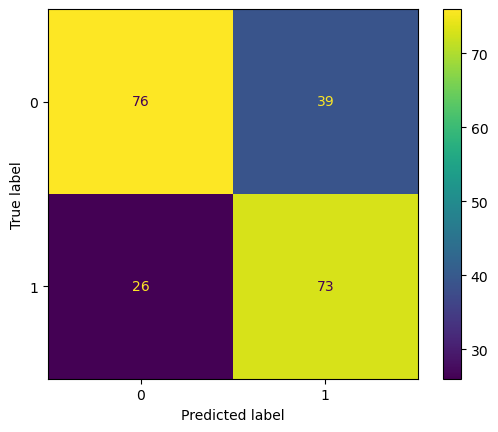

In [62]:
cm1 = confusion_matrix(clf1_ypred, y_test, labels=clf1.classes_)
disp1 = ConfusionMatrixDisplay(cm1, display_labels=clf1.classes_)
disp1.plot();

In [63]:
clf2 = RandomForestClassifier(n_estimators=40, max_depth=10, min_samples_leaf=1, min_samples_split=2, random_state=0)
clf2.fit(X_train, y_train)
clf2_ypred = clf2.predict(X_test)
accuracy_score(clf2_ypred, y_test)

0.7242990654205608

#### RandomForestClassifier ConfusionMatrixDisplay

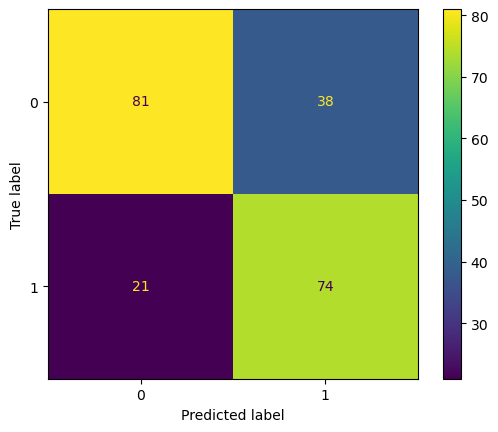

In [64]:
cm2 = confusion_matrix(clf2_ypred, y_test, labels=clf2.classes_)
disp2 = ConfusionMatrixDisplay(cm2, display_labels=clf2.classes_)
disp2.plot();

#### Classification Report for RandomForestClassifier

In [65]:
print(classification_report(y_test, clf2_ypred))

              precision    recall  f1-score   support

           0       0.68      0.79      0.73       102
           1       0.78      0.66      0.71       112

    accuracy                           0.72       214
   macro avg       0.73      0.73      0.72       214
weighted avg       0.73      0.72      0.72       214



#### Classification Report for GradientBoostingClassifier

In [66]:
print(classification_report(y_test, clf1_ypred))

              precision    recall  f1-score   support

           0       0.66      0.75      0.70       102
           1       0.74      0.65      0.69       112

    accuracy                           0.70       214
   macro avg       0.70      0.70      0.70       214
weighted avg       0.70      0.70      0.70       214



#### Feature Importances 

In [67]:
importances = clf1.feature_importances_
feat_imp = pd.Series(importances, index=X.columns).sort_values(ascending=True)

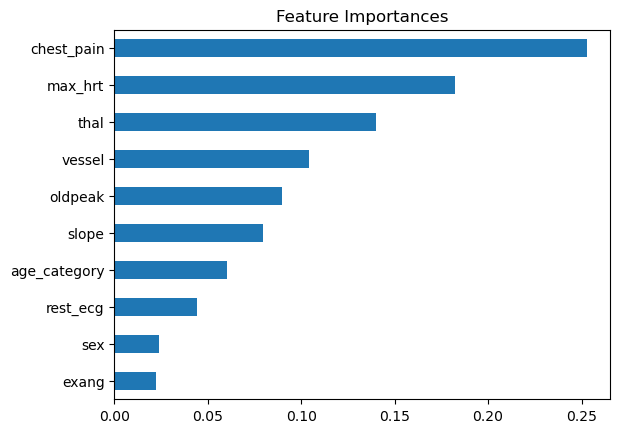

In [68]:
feat_imp.plot(kind = "barh")
plt.title("Feature Importances")
plt.show()

In [72]:
print(len(X_train))
print(len(X_test))
print(len(X_train) + len(X_test))


852
214
1066
